# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>
<ul><a href="#Step1">Step 1: Import data analysis packages</a></ul>
<ul><a href="#Step2">Step 2: Import data to Jupyter notebook</a></ul>
<ul><a href="#Step3">Step 3: Check to see if there are any inconsistencies in the data set</a></ul>
<ul><a href="#Notes">Notes: Description of Columns</a></ul>  
<ul><a href="#Changes">Changes Needed</a></ul>
    
<li><a href="#Cleaning">Data Cleaning</a></li>
<ul><a href="#Step1a">Step 1: Change column names for ease of use</a></ul>   
<ul><a href="#Step2a">Step 2: Remove Patient ID and Appoinment ID</a></ul>
<ul><a href="#Step3a">Step 3: Remove age that is smaller than zero</a></ul>
<ul><a href="#Step4a">Step 4: Reformatting scheduled_day and appointment_day column to datetime</a></ul>
<ul><a href="#Step5a">Step 5: Reformatting the no_show column to integar</a></ul>
<ul><a href="#Changesa">Changes Needed</a></ul>

<li><a href="#eda">Exploratory Data Analysis</a></li>
<ul><a href="#Step1b">Step 1: Create Dataframes</a></ul>   
<ul><a href="#Step2b">Step 2: Visualize Shows vs No Shows</a></ul>
<ul><a href="#Step3b">Step 3: Visualize Neighborhood Locations</a></ul>
<ul><a href="#Step4b">Step 4: Visualize Correlation Between Age and Whether Patient Showed for Appointment</a></ul>
<ul><a href="#Step5b">Step 5: Visualize Correlation Between Whether Patient Received SMS Message and Whether Patient Showed for Appointment</a></ul>
<ul><a href="#Step6b">Step 6: Visualize Correlation Length of Time Between Scheduled Appointment and Date of Appointment and Whether Patient Showed for Appointment</a></ul>


<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> The following are questions that I would like to explore:
> -	What is the overall rate of people who attended their scheduled appointments and the people that did not attend their scheduled appointments?
> -	Which neighborhood location has the most patients scheduled and which location has the most no-shows?
> - Is there a correlation between age and appointment attendance?
> - Is there a correlation between whether the patient received an SMS Message and whether patient showed for appointment?
> - Is there a correlation between the length of time between when the appointment was scheduled and the actual date of appointment and whether the patient appeared for the appointment?
> - Is there a correlation between appointment attendance and gender?


<a id='wrangling'></a>
# Data Wrangling

<a id='Step1'></a>
#### Step 1: Import data analysis packages

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='Step2'></a>
#### Step 2: Import data to Jupyter notebook

In [63]:
df = pd.read_csv('noshowappointments.csv')

<a id='Step3'></a>
#### Step 3: Check to see if there are any inconsistencies in the data set

In [64]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='Notes'></a>
> #### Notes: Description of Columns
>____________________________________________________________________________
> Patient ID - Personal identification number that describes the patient in-house
>
> Appointment ID - The ID used to describe the appointment
>
> Gender - Describing whether the patient is male or female
>
> Scheduled Day - Day the patient scheduled the appointment
>
> Appointment Day - Day the patient is scheduled to arrive at the appointment
>
> Age - Indicates the age of the patient
>
> Neighbourhood - Indicates the location of the appointment
>
> Scholarship - Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
>
> Hipertension - Indicates whether the patient has hipertension
>
> Diabetes - Indicates whether the patient has diabetes
>
> Alcoholism - Indicates whether the patient is an alcoholic or has been an alcoholic
>
> Handcap - Indicates whether the patient is handicap
>
> SMS Recieved - Indicates whether the patient recieved an SMS reminder
>
> No-Show - Indicates whether the patient showed up for the appointment (no meaning showed up, yes meaning no show)

In [65]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [67]:
df.shape

(110527, 14)

Observation: There are 14 columns and 110527 rows

In [68]:
print(sum(df.duplicated()))

0


No null values in the data set

<a id='Changes'></a>
> #### Changes Needed:
    - Change column names for ease of use
    - Remove Patient ID and Appoinment ID because they are unnecessary
    - Remove any age that is smaller than zero
    - Reformatting scheduled_day and appointment_day to datetime
    - Reformatting no_show data to integar

<a id='Cleaning'></a>
# Data Cleaning

<a id='Step1a'></a>
#### Step 1: Change column names for ease of use

In [69]:
new_labels = ['patientID', 'appointmentID', 'gender', 'schedule_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap','sms_received', 'no_show']
df.columns = new_labels
df.tail()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


<a id='Step2a'></a>
#### Step 2: Remove Patient ID and Appoinment ID

In [70]:
df.drop(['patientID', 'appointmentID'], axis=1, inplace=True)

In [71]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='Step3a'></a>
#### Step 3. Remove age that is smaller than zero

In [72]:
meanage = df['age'].mean()
df[df['age'] <= 0] = meanage

In [73]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,1.285691,1.385142,1.259761,1.218296,1.210135,1.500806
std,22.104561,6.519426,6.506669,6.522499,6.527195,6.528421,6.489885
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


<a id='Step4a'></a>
#### Step 4. Reformatting Scheduled Day and Appointment Day to datetime

In [74]:
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender             110527 non-null object
schedule_day       110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null float64
neighborhood       110527 non-null object
scholarship        110527 non-null float64
hypertension       110527 non-null float64
diabetes           110527 non-null float64
alcoholism         110527 non-null float64
handicap           110527 non-null float64
sms_received       110527 non-null float64
no_show            110527 non-null object
dtypes: datetime64[ns](2), float64(7), object(3)
memory usage: 10.1+ MB


<a id='Step5a'></a>
#### Step 5. Reformatting the no_show column to integar

In [76]:
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)
df.head()

,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0
1,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0
2,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0
3,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0
4,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0


<a id='#Changesa'></a>
> #### Changes Needed:
    - Create dataframe for people who showed and people who didn't show
    - Create dataframe for the length of time between schedule_day and appointment_day

<a id='eda'></a>
# Exploratory Data Analysis

<a id='Step1b'></a>
#### Step 1: Create Dataframes

    a. Create data frame for length of time between schedule_day and appointment_day

In [77]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['elapsed_days'] = df['appointment_day'] - df['schedule_day']

    b. Create dataframe for people who did not show for appointment

In [78]:
no_shows = df.query('no_show == "1"')
days = no_shows['elapsed_days'].mean()
timeframe_nos = days / np.timedelta64(1, 'D')

    c. Create dataframe for people who showed for appointment

In [79]:
shows = df.query('no_show == "0"')
days = shows['elapsed_days'].mean()
timeframe_shows = days / np.timedelta64(1, 'D')

<a id='Step2b'></a>
#### Step 2: Visualize Shows vs No Shows

In [80]:
new_df = df.groupby('no_show')['no_show'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['appt_status', 'total']
new_df.iloc[0,0] = "No Show"
new_df.iloc[1,0] = "Show"

nos_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
shows_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])

new_df['proportion'] = [nos_prop, shows_prop]
new_df.head()

,appt_status,total,proportion
0,No Show,88847,0.803849
1,Show,21680,0.196151


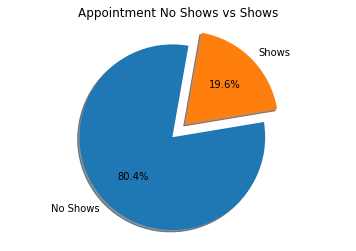

In [81]:
labels = ['No Shows', 'Shows']
sizes = [80.4, 19.6]
explode = (0.1, 0.1)

fig, ax = plt.subplots()

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=80)
ax.axis('equal')
ax.set_title('Appointment No Shows vs Shows')


plt.show()

> This graph shows that there are significantly more no-shows than shows. This shows that it is important to investigate why there are so many no shows.

<a id='Step3b'></a>
#### Step 3: Visualize Neighborhood Locations

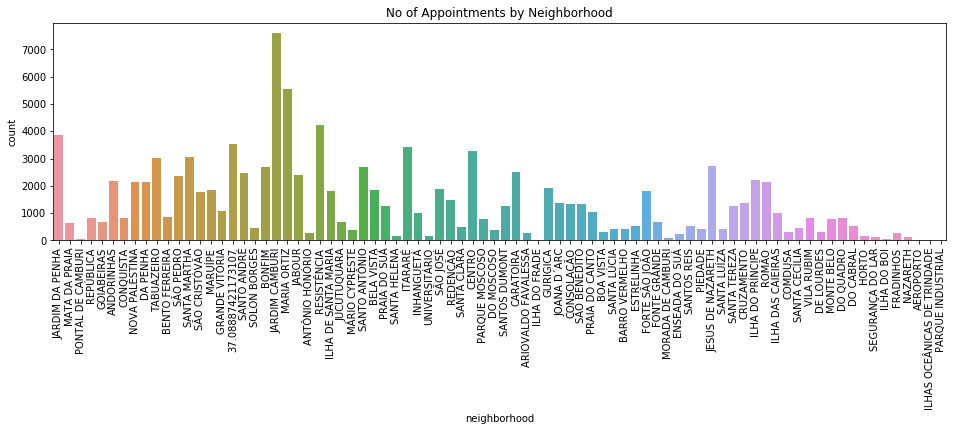

In [82]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.neighborhood)
ax.set_title("No of Appointments by Neighborhood")
plt.show()

> This graph shows the amount of appointments at each location. It is important to note that Jardim Camburi location has the highest number of appointments. According to the chart below, they also have the highest amount of no-shows. Secondly, the Maria Ortiz location has the second highest number of appointments and they have the second highest amount of no-shows. Resistencia has the third highest number of appointments and they have the third highest amount of no-shows.

In [83]:
shows_by_hood = shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(10)

,neighborhood,count
38,JARDIM CAMBURI,6154
43,MARIA ORTIZ,4369
0,37.0889,3540
59,RESISTÊNCIA,3360
39,JARDIM DA PENHA,3224
11,CENTRO,2590
66,SANTA MARTHA,2552
36,ITARARÉ,2514
78,TABUAZEIRO,2467
69,SANTO ANTÔNIO,2198


<a id='Step4b'></a>
#### Step 4: Visualize Correlation Between Age and Whether Patient Showed for Appointment

In [84]:
age_df_noshows = no_shows['age'].mean()
age_df_noshows

35.329151291512915

In [85]:
age_df_shows = shows['age'].mean()
age_df_shows

38.996045051712812

In [86]:
age_df_noshows = no_shows['age']
age_df_shows = shows['age']

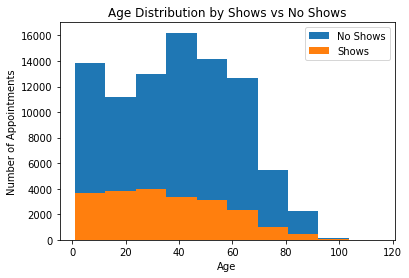

In [87]:
plt.hist(age_df_shows, label='No Shows')
plt.hist(age_df_noshows, label='Shows')
plt.title('Age Distribution by Shows vs No Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.legend();

> This graph shows the correlation between age and whether the patient attended the appointment or not. Between ages 40 and 50, there is an increase of no shows. 

<a id='Step5b'></a>
#### Step 5: Visualize Correlation Between Whether Patient Received SMS Message and Whether Patient Showed for Appointment

In [88]:
noshow_sms_count = no_shows.query('sms_received == 1')
a = noshow_sms_count.shape[0]

In [89]:
shows_sms_count = shows.query('sms_received == 1')
b = shows_sms_count.shape[0]

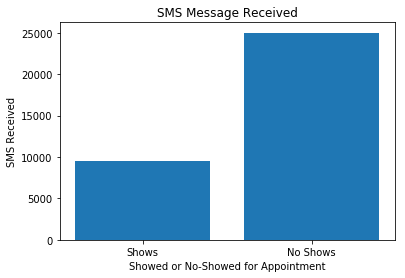

In [90]:
locations = [1, 2]
heights = [a, b]
labels = ['Shows', 'No Shows']

bar1 = plt.bar(locations, heights, tick_label=labels)
plt.title('SMS Message Received')
plt.xlabel('Showed or No-Showed for Appointment')
plt.ylabel('SMS Received');


> This graph shows the correlation between SMS Message received and whether patient appeared for appointment or not. This bar graph shows that there was a significant amount of people that did not show up for their appointment that received the SMS message.

In [91]:
noshow_sms_count = no_shows.query('sms_received == 0')
c = noshow_sms_count.shape[0]

shows_sms_count = shows.query('sms_received == 0')
d = shows_sms_count.shape[0]

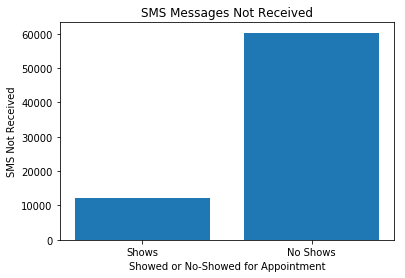

In [92]:
locations = [1, 2]
heights = [c, d]
labels = ['Shows', 'No Shows']

bar2 = plt.bar(locations, heights, tick_label=labels)
plt.title('SMS Messages Not Received')
plt.xlabel('Showed or No-Showed for Appointment')
plt.ylabel('SMS Not Received');

> This graph shows the correlation between SMS Message not received and whether patient appeared for appointment or not. What is surprising, is that in the first graph, there are less people that show up for their appointment if they do not receive the SMS message. This shows that the message is not effective and is actually making the no-show rate worse. 

<a id='Step6b'></a>
#### Step 6: Visualize Correlation Length of Time Between Scheduled Appointment and Date of Appointment and Whether Patient Showed for Appointment

In [93]:
df['between_days'] = df['appointment_day'] - df['schedule_day']

In [94]:
shows = df.query('no_show == "0"')
days = shows['between_days'].mean()
timeframe_shows = days / np.timedelta64(1, 'D')

In [95]:
no_shows = df.query('no_show == "1"')
days = no_shows['between_days'].mean()
timeframe_noshows = days / np.timedelta64(1, 'D')

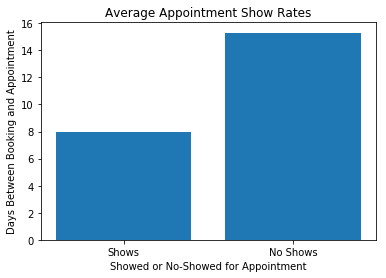

In [96]:
locations = [1, 2]
heights = [timeframe_shows, timeframe_noshows]
labels = ['Shows', 'No Shows']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Appointment Show Rates')
plt.xlabel('Showed or No-Showed for Appointment')
plt.ylabel('Days Between Booking and Appointment');

> This graph shows the correlation between timeframe between the day the appointment was scheduled and the actual date of appointment for no-shows. The graph shows that the attendance is better for pateints that scheduled their appointment less days before their actual appointment. This was not shocking. 

<a id='conclusions'></a>
# Conclusion


#### Research Question 1 - What is the overall rate of people who attended their scheduled appointments and the people that did not attend their scheduled appointments?
-	According to the data, 80.4% of people did not show up for their appointment and 19.6% of people did show up for their appointment. 

#### Research Question 2 - Which neighborhood location has the most patients scheduled and which location has the most no-shows?
-	According to the data, the Jardim Camburi location has the highest number of appointments. They also have the highest amount of no-shows. Secondly, the Maria Ortiz location has the second highest number of appointments and they have the second highest amount of no-shows. Resistencia has the third highest number of appointments and they have the third highest amount of no-shows.

#### Research Question 3 - Is there a correlation between age and appointment attendance?
-	According to the data, there is a correlation between age and appointment attendance. The mean age of no shows is 35 and the mean age of shows is 40.

#### Research Question 4 - Is there a correlation between whether the patient received a SMS Message and whether patient showed for appointment?
-	According to the data, if a patient received a SMS message, they had a 28.6% (estimated) chance of showing up for their appointment. If a patient did not receive a SMS message, they had a 71.4% (estimated)  chance of not showing up for their appointment. 
-	According to the data, if a patient did not receive a SMS message, they had a 16.67% (estimated)  chance of showing up for their appointment. Likewise, they had a 83.33% (estimated) chance of not showing up. 
-	According to the data, there is a correlation between appointment attendance and SMS messages. 

#### Research Question 5 - Is there a correlation between the length of time between when the appointment was scheduled and the actual date of appointment and whether the patient appeared for the appointment?
-	According to the data, the mean timeframe between the day the appointment was scheduled and the actual date of appointment for no-shows was higher than people that showed for their appointment. According to the data, the attendance was better for those patients that scheduled less days before the actual appointment. 


#### Limitations -
- Appointment time could be helpful to see what times these appointments are scheduled for and whether patients are able to get there in time (i.e., morning, afternoon). 
- This data analysis is a bit broad. It would be interesting to narrow it down to just one location and look at the attendance rate at just one location. It would also be interesting to create a questionnaire based on the data and see why people are having a hard time making it to their appointments.
- The SMS Message data needs additional data including the length of time before the appointment that the message was sent.

In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0